  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

C:\Users\Abdul Wahab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 0.13182904  0.40073766]
 [-0.67630105 -2.0558391 ]]
9728.575928115042
4
[0 0 0 ... 0 0 1]
[0 0 0 ... 0 0 1]
[[-0.3676346   0.51808382]
 [ 1.35036199  0.51808382]]
7488.430207264611
14
[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


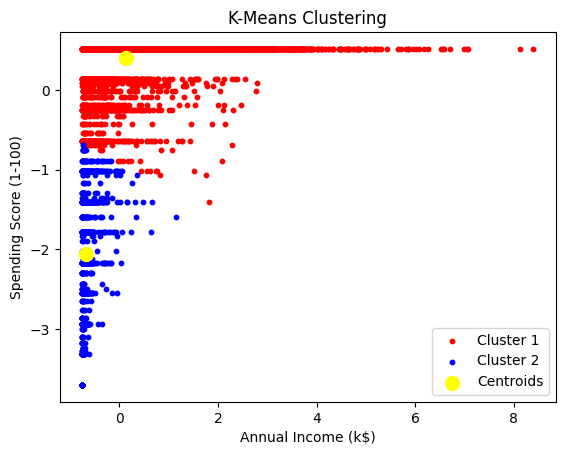

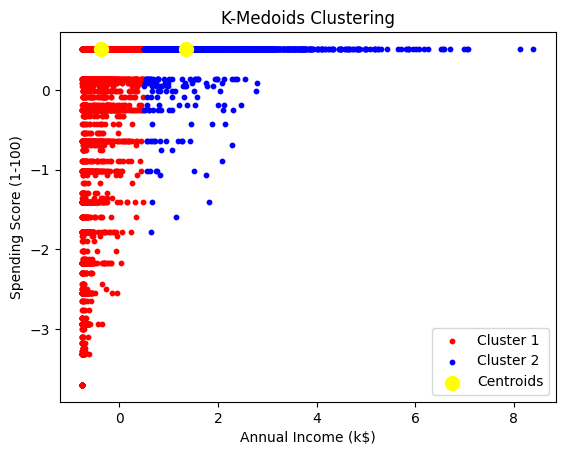

C:\Users\Abdul Wahab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abdul Wahab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abdul Wahab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Abdul Wahab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

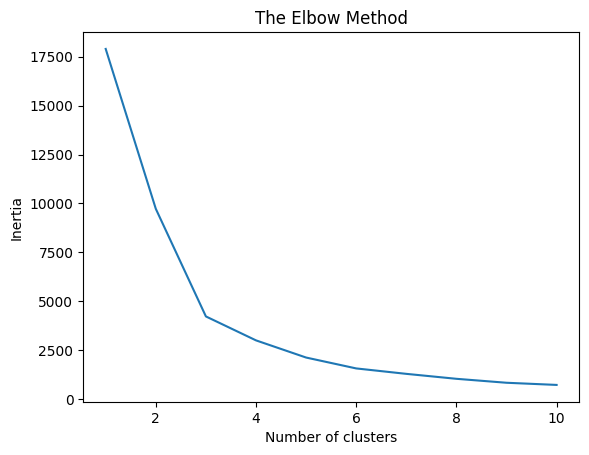

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Importing the dataset
dataset = pd.read_csv('credit_card.csv')
X = dataset.iloc[:, [1, 2]].values # only using 2 features for visualization
y = dataset.iloc[:, -1].values # only using 2 features for visualization

# Exploring the dataset
print(dataset.head())
print(dataset.info())
print(dataset.describe())
print(dataset.isnull().sum())

# Standardizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.labels_)
print(kmeans.predict(X))

# Fitting K-Medoids to the dataset
kmedoids = KMedoids(n_clusters = 2, init = 'k-medoids++', random_state = 42)
y_kmedoids = kmedoids.fit_predict(X)
print(kmedoids.cluster_centers_)
print(kmedoids.inertia_)
print(kmedoids.n_iter_)
print(kmedoids.labels_)
print(kmedoids.predict(X))

# Plotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Plotting the clusters
plt.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('K-Medoids Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Finding the best k value
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_) # inertia is the sum of squared distances of samples to their closest cluster center
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Finding the best k value
inertia = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters = i, init = 'k-medoids++')
    kmedoids.fit(X)
    inertia.append(kmedoids.inertia_) # inertia is the sum of squared distances of samples to their closest cluster center
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Using the best k value, perform predictions
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
print(kmeans.n_iter_)
print(kmeans.labels_)
print(kmeans.predict(X))

# Using the best k value, perform predictions
kmedoids = KMedoids(n_clusters = 2, init = 'k-medoids++', random_state = 42)
y_kmedoids = kmedoids.fit_predict(X)
print(kmedoids.cluster_centers_)
print(kmedoids.inertia_)
print(kmedoids.n_iter_)
print(kmedoids.labels_)
print(kmedoids.predict(X))


